# Predicting heart disease using machine learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.

# What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

More specifically, we'll look at the following topics.

* `Exploratory data analysis (EDA)` - the process of going through a dataset and finding out more about it.

* `Model training` - create model(s) to learn to predict a target variable based on other variables.

* `Model evaluation` - evaluating a models predictions using problem-specific evaluation metrics.

* `Model comparison` - comparing several different models to find the best one.

* `Model fine-tuning` - once we've found a good model, how can we improve it?

* `Feature importance` - since we're predicting the presence of heart disease, are there some things which are more important for prediction?

* `Cross-validation` - if we do build a good model, can we be sure it will work on unseen data?

Reporting what we've found - if we had to present our work, what would we show someone?

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The dataset was taken from UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

Kaggle version: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

> We use independent variables to determine the dependent variables.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease or not, we'll pursue the project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

## 4. Features

This is where you'll get information about each feature of the data.

**Create a data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the libraries we need

# Regular EDA (exploratory data analytics) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load data

In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# (rows, columns)
df.shape 

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset.

Sound checks can be done to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list:

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Count of each class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered balanced. An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

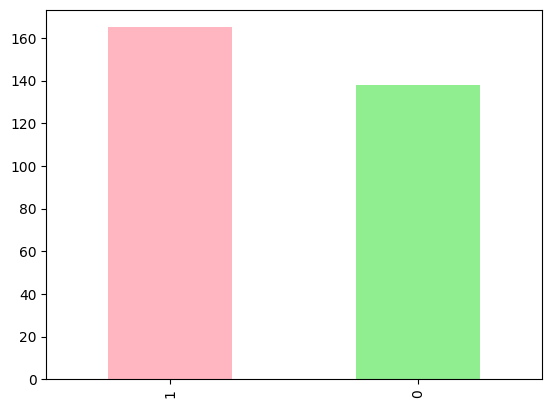

In [10]:
df["target"].value_counts().plot(kind="bar", color=["lightpink", "lightgreen"]);

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

`describe()` shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

To compare two columns to each other, we can use the function pd.crosstab(column_1, column_2).

This is helpful to start gaining an intuition about how independent variables interact with dependent variables.

Let's compare the target column with the sex column.

From our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

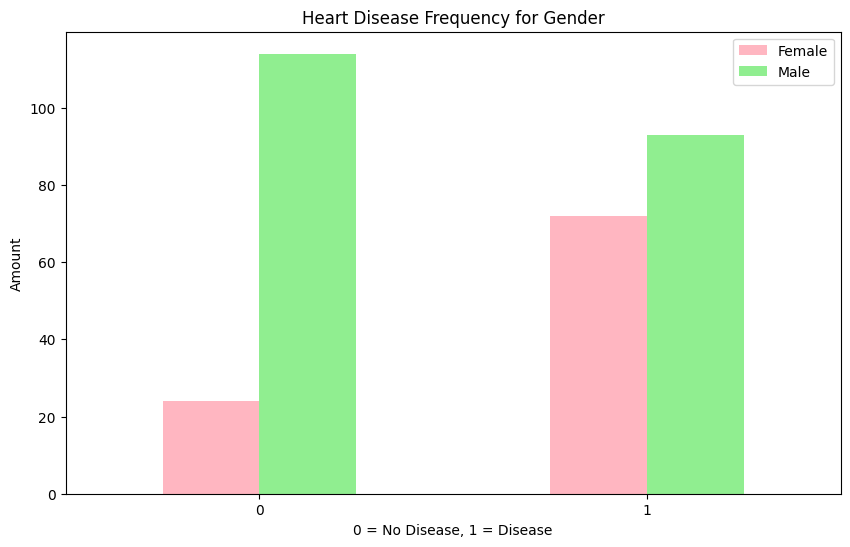

In [15]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["lightpink", "lightgreen"]);

plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

In [24]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Combine a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then compare them to our `target` variable heart disease.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

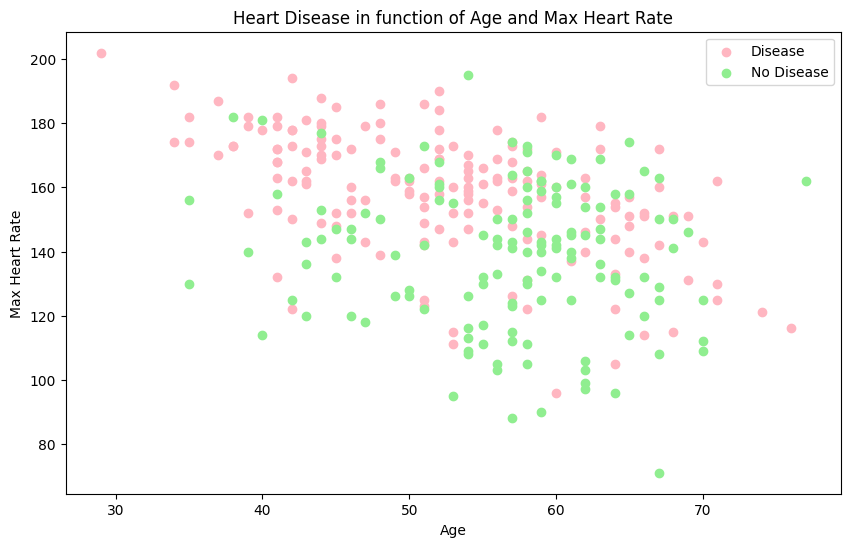

In [16]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples, with disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="lightpink");

# Scatter with negative examples, without disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightgreen");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.

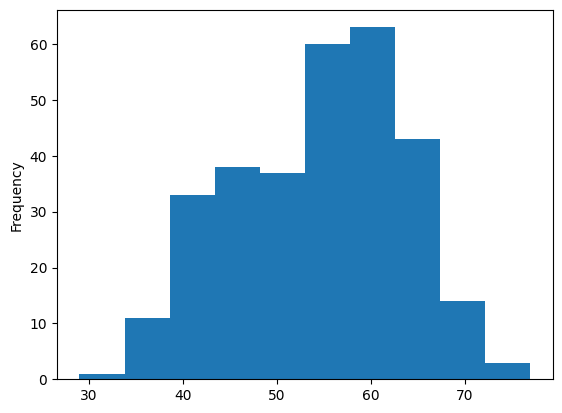

In [17]:
# Check the distribution of the age column with a histogram
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

We can see it's a normal distribution but slightly swaying to the right, which reflects in the scatter plot above.

### Heart Disease Frequency per Chest Pain Type

Trying another independent variable. This time, cp (chest pain).

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


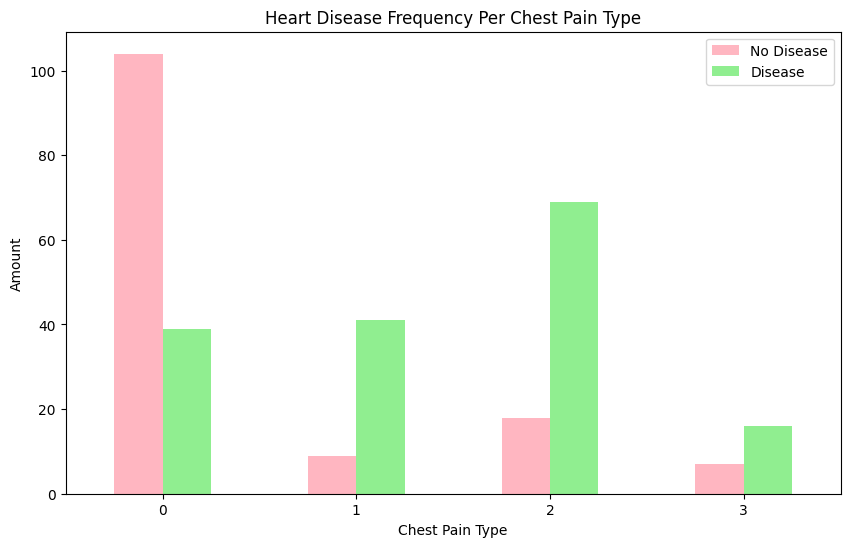

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["lightpink", "lightgreen"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

The different levels of chest pain are. (UCI website)

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

The atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

According to PubMed, it seems even some medical professionals are confused by the term. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/)

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

## Correlation between independent variables

This may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a correlation matrix.

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


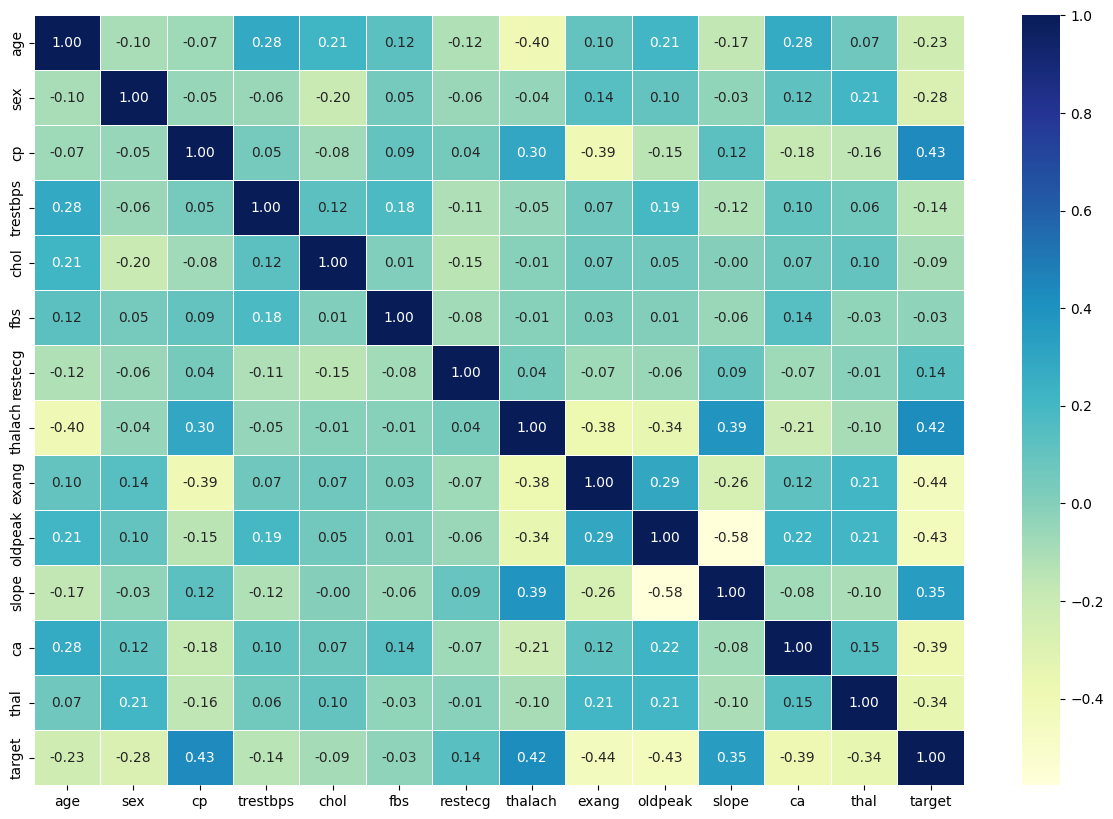

In [37]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

We do exploratory data analysis (EDA) to start building an intuitition of the dataset.

Aside from our basline estimate using sex, the rest of the data seems to be pretty distributed.

Next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.

Not every EDA will look the same, what we've seen here is an example of what we could do for structured, tabular dataset.

We don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data.

We want to quickly find:
* Distributions (df.column.hist())
* Missing values (df.info())
* Outliers

## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [23]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# Split data into train and test sets
np.random.seed(0)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [27]:
y_train, len(y_train)

(74     1
 153    1
 64     1
 296    0
 287    0
       ..
 251    0
 192    0
 117    1
 47     1
 172    0
 Name: target, Length: 242, dtype: int64,
 242)

### Model choices

Now we've got our data split into training and test sets, it's time to build our machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

According to https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Let us skip LinearSVC. Logistic Regression contrary to it's name is a model for classification.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [28]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : traning labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(0)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Life\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Model Comparision

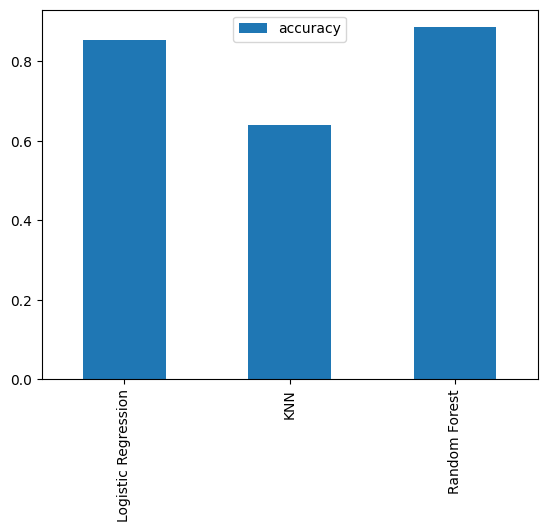

In [30]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, we could use a validation set but since we don't have much data, we'll use cross-validation.

The most common type of cross-validation is k-fold. It involves splitting data into k-fold's and then testing a model on each.

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

## Hyperparameter Tuning (by hand)

In [31]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors (1 to 20 inclusive)
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [33]:
test_scores

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


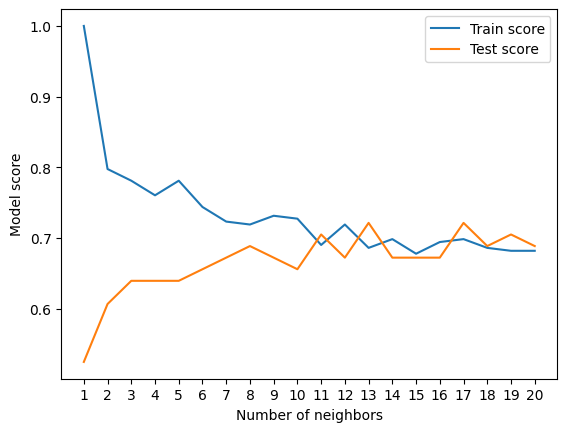

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors` = 13 seems best.

Even knowing this, the KNN's model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard KNN and focus on the other two.

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClasifier()

... using RandomizedSearchCV

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [36]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [37]:
# Tune LogisticRegression
np.random.seed(0)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [39]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [40]:
# Setup random seed
np.random.seed(0)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8524590163934426

In [43]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Hyperparameter Tuning using GridSearchCV

Both of them gave the same score, let us try to improve LogisticRegression with GridSearchCV

In [44]:
# Different hyperparameters for our logisticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparamter search for LogsiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search mode
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [46]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

... and use cross-validation wherever possible.

To make comparisions and evaluate our trained model, first we need to make predictions.

In [47]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict_proba(X_test)
y_preds

array([[0.95394112, 0.04605888],
       [0.17117281, 0.82882719],
       [0.16307139, 0.83692861],
       [0.97776672, 0.02223328],
       [0.89547442, 0.10452558],
       [0.55306648, 0.44693352],
       [0.94916868, 0.05083132],
       [0.88008926, 0.11991074],
       [0.99488854, 0.00511146],
       [0.99656805, 0.00343195],
       [0.20928959, 0.79071041],
       [0.06555034, 0.93444966],
       [0.96660091, 0.03339909],
       [0.14814616, 0.85185384],
       [0.03794666, 0.96205334],
       [0.32701042, 0.67298958],
       [0.93837151, 0.06162849],
       [0.27575372, 0.72424628],
       [0.99390624, 0.00609376],
       [0.14592067, 0.85407933],
       [0.17481256, 0.82518744],
       [0.71452672, 0.28547328],
       [0.92834547, 0.07165453],
       [0.90573372, 0.09426628],
       [0.14407342, 0.85592658],
       [0.51864795, 0.48135205],
       [0.81015098, 0.18984902],
       [0.66624189, 0.33375811],
       [0.02435131, 0.97564869],
       [0.34577406, 0.65422594],
       [0.

In [48]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

## ROC Curve and AUC Scores

ROC curve is a way of understanding how a model is performing by comparing the true positive rate to the false positive rate.

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.



In [49]:
y_preds_positive = y_preds[:, 1]
y_preds_positive[:10]

array([0.04605888, 0.82882719, 0.83692861, 0.02223328, 0.10452558,
       0.44693352, 0.05083132, 0.11991074, 0.00511146, 0.00343195])

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_positive)

In [51]:
# Plot ROC curve and calculate and calculate AUC metric
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

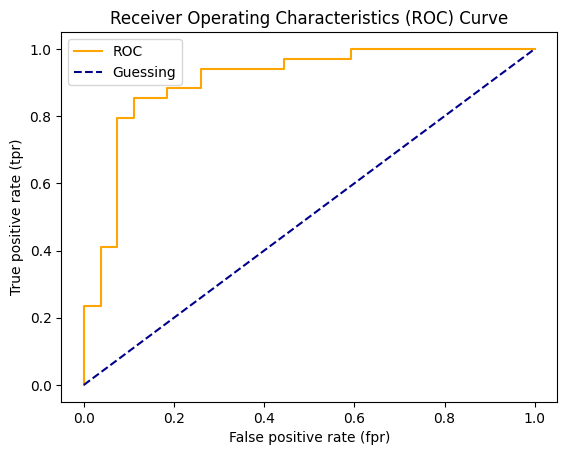

In [52]:
plot_roc_curve(fpr, tpr)

The model does far better than guessing which is the line going from the bottom left corner to the top right corner. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

## Confusion matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [54]:
y_preds = gs_log_reg.predict(X_test)

In [55]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  5]
 [ 4 30]]


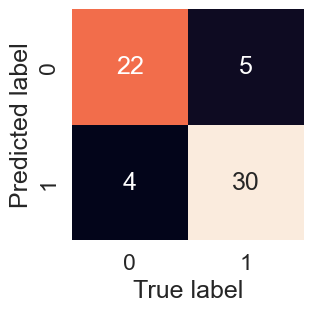

In [56]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

We can see the model gets confused (predicts the wrong label) relatively the same across both classes.

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross validated precision. recall, f2-score.

## Classification report

A classification report will also give us information of the precision and recall of our model for each class.

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
**Support** - The number of samples each metric was calculated on.

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

**Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

In [60]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [61]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [64]:
# Cross-validateed precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [65]:
# Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [66]:
# Cross validated f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

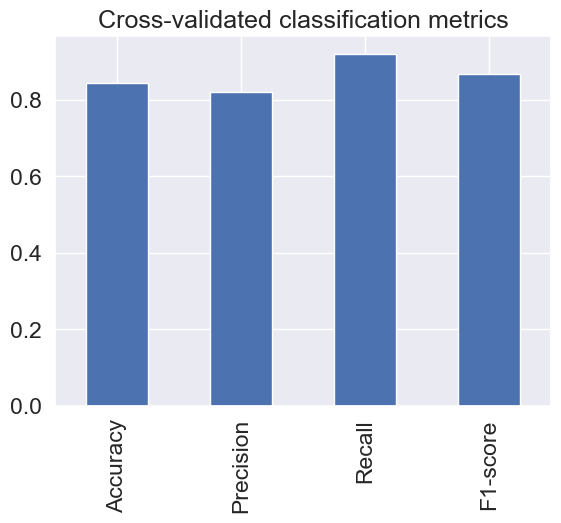

In [68]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1-score": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogsiticRegression model....

The `coef_` attribute is the coefficient of the features in the decision function.

In [69]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train);

In [70]:
# Check coef_
clf.coef_

array([[ 0.00407776, -0.95728964,  0.63785997, -0.00948748, -0.00275127,
        -0.1661072 ,  0.15292919,  0.0267774 , -0.57828877, -0.48950221,
         0.15406381, -0.72894777, -0.54862498]])

In [71]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004077758712005291,
 'sex': -0.9572896381352864,
 'cp': 0.6378599660693982,
 'trestbps': -0.009487477443718114,
 'chol': -0.0027512660979963958,
 'fbs': -0.16610720436456916,
 'restecg': 0.15292919498988936,
 'thalach': 0.02677739579264208,
 'exang': -0.5782887702602713,
 'oldpeak': -0.48950221341082434,
 'slope': 0.1540638053964038,
 'ca': -0.728947774077894,
 'thal': -0.5486249788978241}

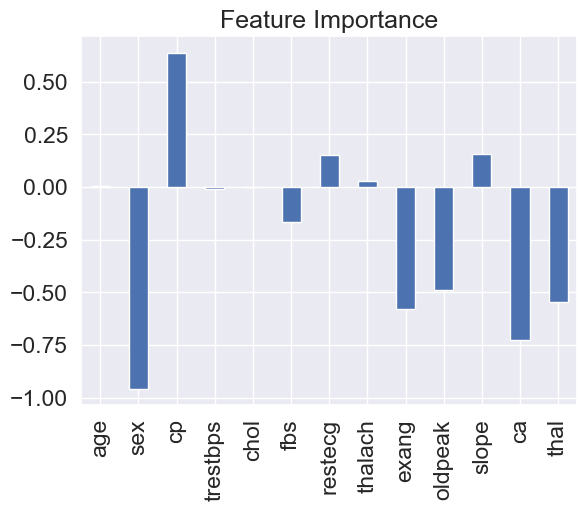

In [73]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of `-0.904`, which means as the value for sex increases, the target value decreases.

In [74]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


When sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

The model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [117]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope is the "slope of the peak exercise ST segment" where:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of `0.470`, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

 As slope goes up, so does target.

# 6. Experimentation

If we haven't hit your evaluation metric yet:

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metrix) how would we export it and share it with others? (Ans: Pickle, joblib)